In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## 1
### 1.1

In [2]:
population = read.csv("FAOSTAT_data_12-12-2020_population.csv", header=TRUE)

In [3]:
pop <- population %>% select (Area, Year, Value) %>% filter(Year==2013) 

In [4]:
sum(pop['Value'])

[1] 8633817

In [5]:
pop1 <- population %>% filter(Area.Code!=351)

In [6]:
pop1 %>% filter(Area.Code==351) 

Domain.Code,Domain,Area.Code,Area,Element.Code,Element,Item.Code,Item,Year.Code,Year,Unit,Value,Flag,Flag.Description,Note
<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>


In [7]:
pop_r <- pop1 %>% select (Area, Year, Value) %>% filter(Year==2013) 

In [8]:
sum(pop_r['Value'])

[1] 7210846

In [9]:
population_final <- pop1 %>% select(Area,Area.Code,Year,Value) %>% mutate(Population = Value * 1000) %>% select(Area,Area.Code,Year,Population)

In [10]:
p1 <- population_final %>% select (Area, Year, Population) %>% filter(Year==2013)
sum(p1['Population'])

[1] 7210845848

In [11]:
p2 <- population_final %>% select (Area, Year, Population) %>% filter(Year==2018)
sum(p2['Population'])

[1] 7631368523

In [12]:
population_final <- population_final %>% rename(c("country"="Area", "year"="Year"))
population_final

country,Area.Code,year,Population
<fct>,<int>,<int>,<dbl>
Afghanistan,2,2013,32269589
Afghanistan,2,2014,33370794
Afghanistan,2,2015,34413603
Afghanistan,2,2016,35383032
Afghanistan,2,2017,36296113
Afghanistan,2,2018,37171921
Albania,3,2013,2903790
Albania,3,2014,2896305
Albania,3,2015,2890513


## 2
### 2.1
2.1.1

In [13]:
dispo_alim = read.csv("ani_and_veg.csv", header=TRUE)

In [14]:
dispo_alim <- dispo_alim %>% select(country_code,country,year,item,item_code,origin,domestic_supply_quantity,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,fat_supply_quantity_gcapitaday)


In [15]:
dispo_alim <- dispo_alim %>% select(country_code,country,year,item,item_code,origin,domestic_supply_quantity,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,fat_supply_quantity_gcapitaday)

In [16]:
cereal_code = c(2511,2805,2513,2514,2517,2520,2515,2516,2518)

In [17]:
dispo_alim <- dispo_alim %>% mutate(is_cereal = ifelse(item_code %in% cereal_code, TRUE, FALSE))

In [18]:
dispo_alim

country_code,country,year,item,item_code,origin,domestic_supply_quantity,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,fat_supply_quantity_gcapitaday,is_cereal
<int>,<fct>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,Armenia,2014,Wheat and products,2511,vegetal,639,1039,30.98,3.69,TRUE
1,Armenia,2015,Wheat and products,2511,vegetal,685,1049,31.27,3.84,TRUE
1,Armenia,2016,Wheat and products,2511,vegetal,650,1057,31.50,3.90,TRUE
1,Armenia,2017,Wheat and products,2511,vegetal,558,1053,31.35,3.97,TRUE
1,Armenia,2014,Barley and products,2513,vegetal,196,8,0.27,0.04,TRUE
1,Armenia,2015,Barley and products,2513,vegetal,203,8,0.29,0.04,TRUE
1,Armenia,2016,Barley and products,2513,vegetal,213,7,0.25,0.04,TRUE
1,Armenia,2017,Barley and products,2513,vegetal,114,4,0.15,0.02,TRUE
1,Armenia,2014,Maize and products,2514,vegetal,88,60,3.14,0.68,TRUE


2.1.2

In [19]:
true <- dispo_alim %>% filter (is_cereal==TRUE)
sum(true['domestic_supply_quantity'],na.rm=TRUE)

[1] 13698456

In [20]:
false <- dispo_alim %>% filter (is_cereal==FALSE)
sum(false['domestic_supply_quantity'],na.rm=TRUE)

[1] 38312084

In [21]:
13698456 / (38312084) * 100

[1] 35.75492

## 2.2
2.2.1


In [22]:
dispo_alim_pop <- merge(dispo_alim, population_final, by = c("country","year"))

In [23]:
dispo_alim_pop

country,year,country_code,item,item_code,origin,domestic_supply_quantity,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,fat_supply_quantity_gcapitaday,is_cereal,Area.Code,Population
<fct>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<int>,<dbl>
Afghanistan,2014,2,Wheat and products,2511,vegetal,6697,1325,35.70,4.52,TRUE,2,33370794
Afghanistan,2014,2,Rye and products,2515,vegetal,0,NA,NA,0.00,TRUE,2,33370794
Afghanistan,2014,2,"Spices, Other",2645,vegetal,2,0,0.01,0.01,FALSE,2,33370794
Afghanistan,2014,2,Pepper,2640,vegetal,0,0,0.00,0.00,FALSE,2,33370794
Afghanistan,2014,2,"Roots, Other",2534,vegetal,0,NA,NA,NA,FALSE,2,33370794
Afghanistan,2014,2,Soyabean Oil,2571,vegetal,10,7,0.00,0.82,FALSE,2,33370794
Afghanistan,2014,2,Barley and products,2513,vegetal,532,13,0.41,0.12,TRUE,2,33370794
Afghanistan,2014,2,Pimento,2641,vegetal,0,NA,NA,NA,FALSE,2,33370794
Afghanistan,2014,2,Yams,2535,vegetal,0,NA,NA,NA,FALSE,2,33370794


In [24]:
dispo_alim_country <-dispo_alim %>% select (country,year,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday) %>% group_by(country,year) %>% 
                summarise(total_food_supply_kcalcapitaday = sum(food_supply_kcalcapitaday,na.rm=TRUE),
                       total_protein_supply_quantity_kgcapitaday = 1000*sum(protein_supply_quantity_gcapitaday,na.rm=TRUE)) 

`summarise()` regrouping output by 'country' (override with `.groups` argument)



In [25]:
head(dispo_alim_country)

country,year,total_food_supply_kcalcapitaday,total_protein_supply_quantity_kgcapitaday
<fct>,<int>,<dbl>,<dbl>
Afghanistan,2014,2018,56130
Afghanistan,2015,1974,54620
Afghanistan,2016,2004,54600
Afghanistan,2017,1997,54090
Albania,2014,3272,113460
Albania,2015,3255,111670


In [26]:
dispo_alim_pop <- dispo_alim_pop %>% mutate (food_supply_kcal=Population*food_supply_kcalcapitaday*365, food_supply_kgprotein=Population*protein_supply_quantity_gcapitaday*365/1000)

In [27]:
dispo_alim_pop %>% filter(country=="Armenia")

country,year,country_code,item,item_code,origin,domestic_supply_quantity,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,fat_supply_quantity_gcapitaday,is_cereal,Area.Code,Population,food_supply_kcal,food_supply_kgprotein
<fct>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<int>,<dbl>,<dbl>,<dbl>
Armenia,2014,1,Wheat and products,2511,vegetal,639,1039,30.98,3.69,TRUE,1,2912409,1.104487e+12,32932647.25
Armenia,2014,1,Palm Oil,2577,vegetal,1,NA,NA,NA,FALSE,1,2912409,NA,NA
Armenia,2014,1,Rye and products,2515,vegetal,1,1,0.03,0.01,TRUE,1,2912409,1.063029e+09,31890.88
Armenia,2014,1,Onions,2602,vegetal,58,17,0.60,0.11,FALSE,1,2912409,1.807150e+10,637817.57
Armenia,2014,1,Sweet potatoes,2533,vegetal,0,0,0.00,0.00,FALSE,1,2912409,0.000000e+00,0.00
Armenia,2014,1,Beer,2656,vegetal,16,8,0.08,0.00,FALSE,1,2912409,8.504234e+09,85042.34
Armenia,2014,1,Cottonseed Oil,2575,vegetal,0,0,0.00,0.00,FALSE,1,2912409,0.000000e+00,0.00
Armenia,2014,1,Barley and products,2513,vegetal,196,8,0.27,0.04,TRUE,1,2912409,8.504234e+09,287017.91
Armenia,2014,1,"Roots, Other",2534,vegetal,0,0,0.00,0.00,FALSE,1,2912409,0.000000e+00,0.00


2.2.2

In [28]:
dispo_alim_pop<- dispo_alim_pop %>% mutate (ratio_energie_poids = food_supply_kcal/(domestic_supply_quantity*1000000))

In [29]:
dispo_alim_pop %>% filter(country=="Armenia" & item_code==2516)

country,year,country_code,item,item_code,origin,domestic_supply_quantity,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,fat_supply_quantity_gcapitaday,is_cereal,Area.Code,Population,food_supply_kcal,food_supply_kgprotein,ratio_energie_poids
<fct>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Armenia,2014,1,Oats,2516,vegetal,8,5,0.19,0.09,TRUE,1,2912409,5315146425,201975.6,664.3933
Armenia,2015,1,Oats,2516,vegetal,10,5,0.18,0.08,TRUE,1,2925553,5339134225,192208.8,533.9134
Armenia,2016,1,Oats,2516,vegetal,10,5,0.20,0.10,TRUE,1,2936143,5358460975,214338.4,535.8461
Armenia,2017,1,Oats,2516,vegetal,7,7,0.26,0.12,TRUE,1,2944791,7523941005,279460.7,1074.8487


2.2.3

In [30]:
dispo_alim_pop<- dispo_alim_pop %>% mutate (ratio_poids_proteines_poids_total = food_supply_kgprotein/(domestic_supply_quantity*1000000))

In [31]:
dispo_alim_pop %>% filter(country=="Armenia" & item_code==2516)

country,year,country_code,item,item_code,origin,domestic_supply_quantity,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,fat_supply_quantity_gcapitaday,is_cereal,Area.Code,Population,food_supply_kcal,food_supply_kgprotein,ratio_energie_poids,ratio_poids_proteines_poids_total
<fct>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Armenia,2014,1,Oats,2516,vegetal,8,5,0.19,0.09,TRUE,1,2912409,5315146425,201975.6,664.3933,0.02524695
Armenia,2015,1,Oats,2516,vegetal,10,5,0.18,0.08,TRUE,1,2925553,5339134225,192208.8,533.9134,0.01922088
Armenia,2016,1,Oats,2516,vegetal,10,5,0.20,0.10,TRUE,1,2936143,5358460975,214338.4,535.8461,0.02143384
Armenia,2017,1,Oats,2516,vegetal,7,7,0.26,0.12,TRUE,1,2944791,7523941005,279460.7,1074.8487,0.03992295


## 2.3
2.3.1

In [32]:
dispo_alim_pop

country,year,country_code,item,item_code,origin,domestic_supply_quantity,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,fat_supply_quantity_gcapitaday,is_cereal,Area.Code,Population,food_supply_kcal,food_supply_kgprotein,ratio_energie_poids,ratio_poids_proteines_poids_total
<fct>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2014,2,Wheat and products,2511,vegetal,6697,1325,35.70,4.52,TRUE,2,33370794,1.613895e+13,434838131.2,2409.8776,0.064930287
Afghanistan,2014,2,Rye and products,2515,vegetal,0,NA,NA,0.00,TRUE,2,33370794,NA,NA,NA,NA
Afghanistan,2014,2,"Spices, Other",2645,vegetal,2,0,0.01,0.01,FALSE,2,33370794,0.000000e+00,121803.4,0.0000,0.060901699
Afghanistan,2014,2,Pepper,2640,vegetal,0,0,0.00,0.00,FALSE,2,33370794,0.000000e+00,0.0,NaN,NaN
Afghanistan,2014,2,"Roots, Other",2534,vegetal,0,NA,NA,NA,FALSE,2,33370794,NA,NA,NA,NA
Afghanistan,2014,2,Soyabean Oil,2571,vegetal,10,7,0.00,0.82,FALSE,2,33370794,8.526238e+10,0.0,8526.2379,0.000000000
Afghanistan,2014,2,Barley and products,2513,vegetal,532,13,0.41,0.12,TRUE,2,33370794,1.583444e+11,4993939.3,297.6399,0.009387104
Afghanistan,2014,2,Pimento,2641,vegetal,0,NA,NA,NA,FALSE,2,33370794,NA,NA,NA,NA
Afghanistan,2014,2,Yams,2535,vegetal,0,NA,NA,NA,FALSE,2,33370794,NA,NA,NA,NA


In [33]:
aliments_les_plus_cal <- dispo_alim_pop %>% select(item,ratio_energie_poids,ratio_poids_proteines_poids_total) %>% 
                         drop_na(ratio_energie_poids,ratio_poids_proteines_poids_total) %>% 
                        filter(ratio_energie_poids!=0 & is.finite(ratio_energie_poids)==TRUE) %>%
                        group_by(item) %>% summarise(ratio_kcal_kg=mean(ratio_energie_poids),protein_pourcentage = mean(ratio_poids_proteines_poids_total)*100) %>%
                        arrange(desc(ratio_kcal_kg)) %>% head(20)
aliments_les_plus_cal

`summarise()` ungrouping output (override with `.groups` argument)



item,ratio_kcal_kg,protein_pourcentage
<fct>,<dbl>,<dbl>
"Butter, Ghee",52645.519,2.17595294
Cocoa Beans and products,19634.206,36.75895591
"Fats, Animals, Raw",9722.878,1.43594314
Ricebran Oil,8872.869,0.00000000
Sesameseed Oil,8867.624,0.00000000
Groundnut Oil,8554.235,0.00000000
Maize Germ Oil,8363.753,0.01896400
Olive Oil,8205.236,0.00000000
Cottonseed Oil,8025.535,0.02203768


2.3.2

In [34]:
aliments_les_plus_proteine <- dispo_alim_pop %>% select(item,ratio_energie_poids,ratio_poids_proteines_poids_total) %>% 
                         drop_na(ratio_energie_poids,ratio_poids_proteines_poids_total) %>% 
                        filter(ratio_poids_proteines_poids_total!=0 & is.finite(ratio_poids_proteines_poids_total)==TRUE) %>%
                        group_by(item) %>% summarise(ratio_kcal_kg=mean(ratio_energie_poids),protein_pourcentage = mean(ratio_poids_proteines_poids_total)*100) %>%
                        arrange(desc(protein_pourcentage)) %>% head(20)
aliments_les_plus_proteine

`summarise()` ungrouping output (override with `.groups` argument)



item,ratio_kcal_kg,protein_pourcentage
<fct>,<dbl>,<dbl>
Cocoa Beans and products,18687.9792,36.121361
"Meat, Other",1147.2199,18.993810
Beans,2667.3526,17.421550
Peas,2373.9171,16.049158
"Pulses, Other and products",2276.4515,14.643894
Groundnuts (Shelled Eq),3223.6375,14.604583
"Offals, Edible",956.7199,14.591273
Infant food,3269.7605,14.500970
Mutton & Goat Meat,1940.3466,13.319529


## 2.4

In [35]:
sapply(dispo_alim_pop, function(x) sum(is.na(x)))

country                               year 
                                 0                                  0 
                      country_code                               item 
                                 0                                  0 
                         item_code                             origin 
                                 0                                  0 
          domestic_supply_quantity          food_supply_kcalcapitaday 
                               590                               6447 
protein_supply_quantity_gcapitaday     fat_supply_quantity_gcapitaday 
                              6324                               6302 
                         is_cereal                          Area.Code 
                                 0                                  0 
                        Population                   food_supply_kcal 
                                 0                               6447 
             food_supply_kgprotein                ratio_energie_poids 
                              6324                              18690 
 ratio_poids_proteines_poids_total 
                             18387

In [36]:
veg_dispo <- dispo_alim_pop %>% 
                   filter(origin=="vegetal") %>% #& food_supply_kcal!= 0 | food_supply_kgprotein!= 0 )& is.finite(food_supply_kgprotein)==FALSE))
                   group_by(year) %>% summarise(dom_sup_kcal=sum(food_supply_kcal,na.rm=TRUE), dom_sup_kgprot=sum(food_supply_kgprotein,na.rm=TRUE))
veg_dispo

`summarise()` ungrouping output (override with `.groups` argument)



year,dom_sup_kcal,dom_sup_kgprot
<int>,<dbl>,<dbl>
2014,6.163196e+15,127559184778
2015,6.257970e+15,129744472919
2016,6.344464e+15,132245101174
2017,6.439711e+15,134722906360


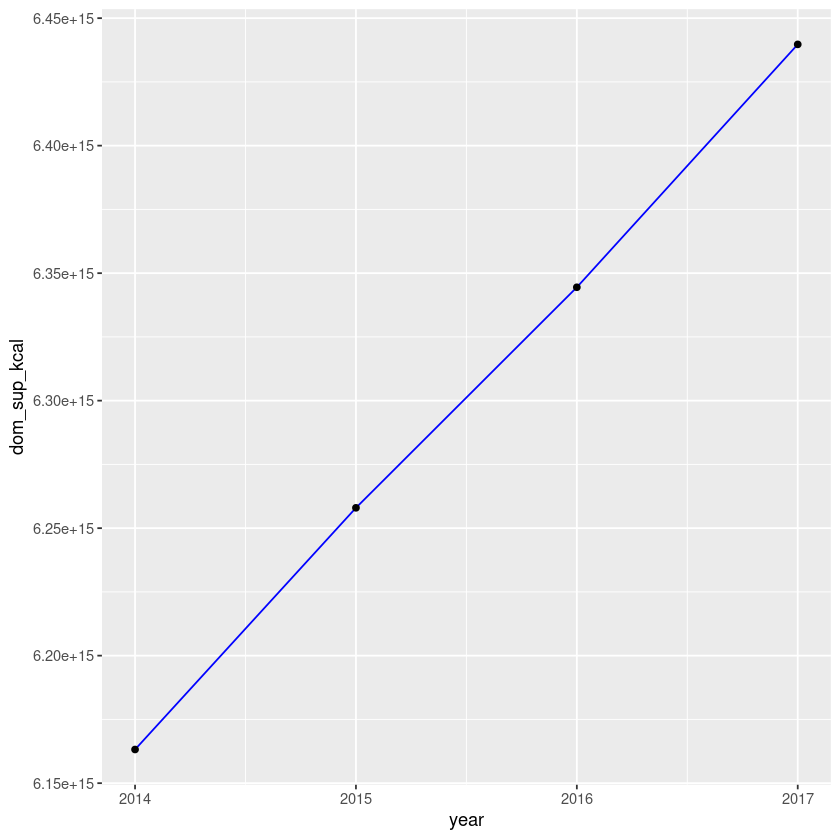

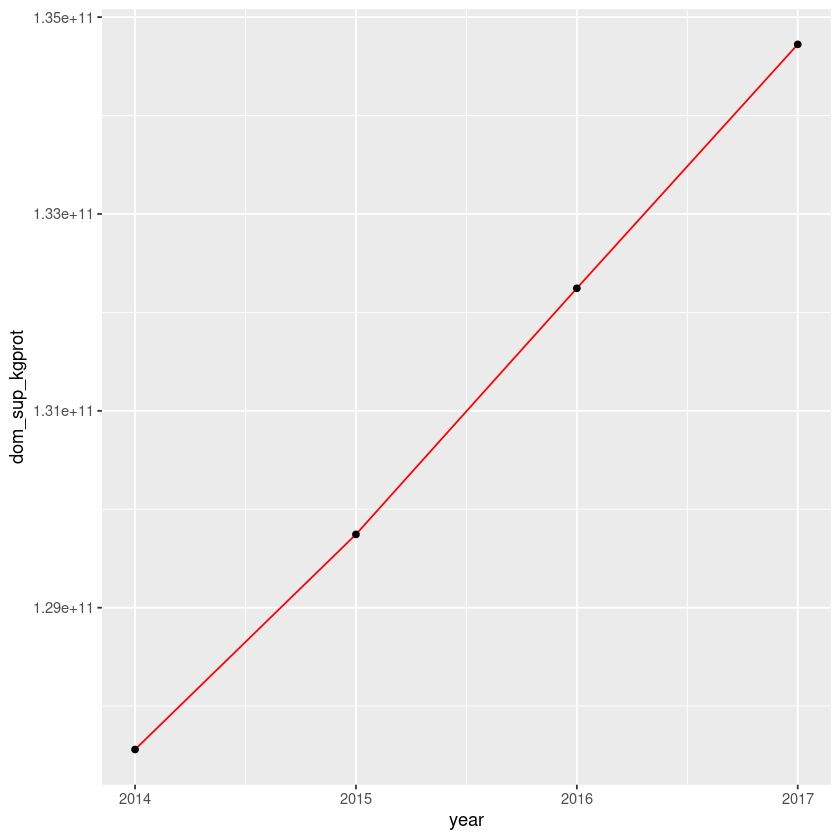

In [37]:
ggplot(data=veg_dispo, aes(x=year, y=dom_sup_kcal,group=1)) +
  geom_line(color="blue")+
  geom_point()

ggplot(data=veg_dispo, aes(x=year, y=dom_sup_kgprot, group=1)) +
  geom_line(color="red")+
  geom_point()

In [38]:
veg_dispo

year,dom_sup_kcal,dom_sup_kgprot
<int>,<dbl>,<dbl>
2014,6.163196e+15,127559184778
2015,6.257970e+15,129744472919
2016,6.344464e+15,132245101174
2017,6.439711e+15,134722906360


2.4.2

Question 7 : Combien d'humains pourraient être nourris si toute la disponibilité intérieure mondiale de produits végétaux était utilisée pour de la nourriture ?
Nombre de calories par jour et par personne
NB_KCAL_PER_CAPITA_PER_DAY = 2500

Poids moyen d'un humain : 62kg (https://en.wikipedia.org/wiki/Human_body_weight)
Besoin en protéines moyens pour un humain : 0.9 g/kg/jour
KG_PROT_PER_CAPITA_PER_DAY = 62 * .9 * .001

YEAR = 2013

population = dom_sup.loc[YEAR, "dom_sup_kcal"] / 365 / NB_KCAL_PER_CAPITA_PER_DAY

print("Population potentiellement nourrie par la disponibilité intérieure en produits issus de végétaux (en termes calorifiques) : {} Miliards, \nsoit {}% de la population mondiale.".format(round(population/1000000000,2), round(100*population/total_pop[YEAR])))

population = dom_sup.loc[YEAR, "dom_sup_kgprot"] / 365 / KG_PROT_PER_CAPITA_PER_DAY

print("Population potentiellement nourrie par la disponibilité intérieure en produits issus de végétaux (en termes de protéines) : {} Miliards, \nsoit {}% de la population mondiale.".format(round(population/1000000000,2), round(100*population/total_pop[YEAR])))

In [39]:
NB_KCAL_PER_CAPITA_PER_DAY <- 2500
KG_PROT_PER_CAPITA_PER_DAY <- 62 * .9 * .001

In [40]:
population_total <- population_final %>% group_by(year) %>% summarise(population_total=sum(Population))
population_total
veg_dispo_total_population <- merge(veg_dispo,population_total)
veg_dispo_total_population

`summarise()` ungrouping output (override with `.groups` argument)



year,population_total
<int>,<dbl>
2013,7210845848
2014,7295557771
2015,7380067075
2016,7464294742
2017,7548134111
2018,7631368523


year,dom_sup_kcal,dom_sup_kgprot,population_total
<int>,<dbl>,<dbl>,<dbl>
2014,6.163196e+15,127559184778,7295557771
2015,6.257970e+15,129744472919,7380067075
2016,6.344464e+15,132245101174,7464294742
2017,6.439711e+15,134722906360,7548134111


In [41]:
veg_dispo_total_population <- veg_dispo_total_population %>% mutate(pop_potentiel_cal=dom_sup_kcal/365/NB_KCAL_PER_CAPITA_PER_DAY,
                                                                    pop_potentiel_proteine=dom_sup_kgprot/365/KG_PROT_PER_CAPITA_PER_DAY)

In [42]:
veg_dispo_total_population

year,dom_sup_kcal,dom_sup_kgprot,population_total,pop_potentiel_cal,pop_potentiel_proteine
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2014,6.163196e+15,127559184778,7295557771,6754187749,6263032591
2015,6.257970e+15,129744472919,7380067075,6858049540,6370328125
2016,6.344464e+15,132245101174,7464294742,6952836738,6493106553
2017,6.439711e+15,134722906360,7548134111,7057217372,6614764391


In [49]:
veg_dispo_total_population_pourcentage <- veg_dispo_total_population %>% mutate(pop_potentiel_cal_pourcentage=pop_potentiel_cal/population_total*100,
                                                                                pop_potentiel_proteine_pourcentage=pop_potentiel_proteine/population_total*100)
veg_dispo_total_population_pourcentage

year,dom_sup_kcal,dom_sup_kgprot,population_total,pop_potentiel_cal,pop_potentiel_proteine,pop_potentiel_cal_pourcentage,pop_potentiel_proteine_pourcentage
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2014,6.163196e+15,127559184778,7295557771,6754187749,6263032591,92.57946,85.84721
2015,6.257970e+15,129744472919,7380067075,6858049540,6370328125,92.92666,86.31802
2016,6.344464e+15,132245101174,7464294742,6952836738,6493106553,93.14794,86.98888
2017,6.439711e+15,134722906360,7548134111,7057217372,6614764391,93.49618,87.63443


In [43]:
6754187749/7295557771

[1] 0.9257946

In [44]:
round(7295557771/1000000000,2)

[1] 7.3

In [45]:
round(100*6754187749/7295557771) 

[1] 93

In [46]:
6754187749/7295557771

[1] 0.9257946

In [47]:
127559184778/KG_PROT_PER_CAPITA_PER_DAY/365

[1] 6263032591

In [52]:
dispo_alim_veg_pop <-dispo_alim_pop %>% filter(origin=="vegetal")

In [67]:
list_veg <- unique(dispo_alim_veg_pop["item"])
list_veg

,item
,<fct>
1,Wheat and products
2,Rye and products
3,"Spices, Other"
4,Pepper
5,"Roots, Other"
6,Soyabean Oil
7,Barley and products
8,Pimento
9,Yams


In [70]:
dispo_alim_cereal_pop <-dispo_alim_pop %>% filter(is_cereal==TRUE)

In [80]:
feed <- unique(dispo_alim_cereal_pop["item"])
feed

,item
,<fct>
1,Wheat and products
2,Rye and products
3,Barley and products
4,Maize and products
5,Oats
6,Millet and products
7,Sorghum and products
8,"Cereals, Other"
9,Rice and products


In [62]:
waste <- unique(dispo_alim_veg_pop["item"]) %>% filter(str_detect(item, " Oil"))
waste

item
<fct>
Soyabean Oil
Groundnut Oil
Sunflowerseed Oil
Ricebran Oil
Maize Germ Oil
"Oilcrops Oil, Other"
Rape and Mustard Oil
Cottonseed Oil
Palmkernel Oil


In [74]:
list_veg[(list_veg %in% food) & (list_veg %in% waste),] 
#unique(dispo_alim_veg_pop["item"]) - food

factor(0)
98 Levels: Alcohol, Non-Food Apples and products ... Yams

In [81]:
without_feed <- anti_join(list_veg, feed, by = "item")
food <- anti_join(without_feed, waste, by = "item")
food

item
<fct>
"Spices, Other"
Pepper
"Roots, Other"
Pimento
Yams
Cloves
Sugar cane
"Pulses, Other and products"
Sweet potatoes
